### Clustering Results ###
Number of clusters formed: 5
Davies-Bouldin Index (DB Index): 0.8748
Silhouette Score: 0.4795
Calinski-Harabasz Index: 106.6782


### 1. t-SNE for 2D Visualization ###


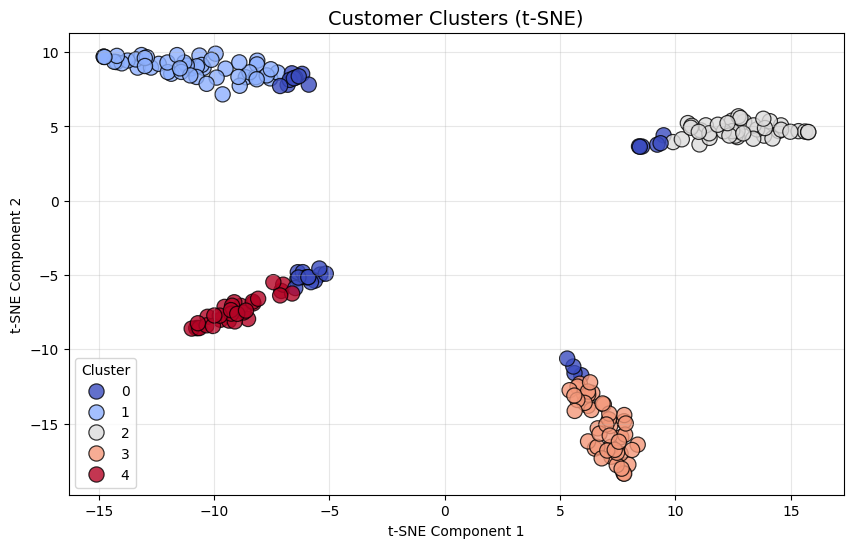


### 2. Pair Plots for Cluster Profiling ###


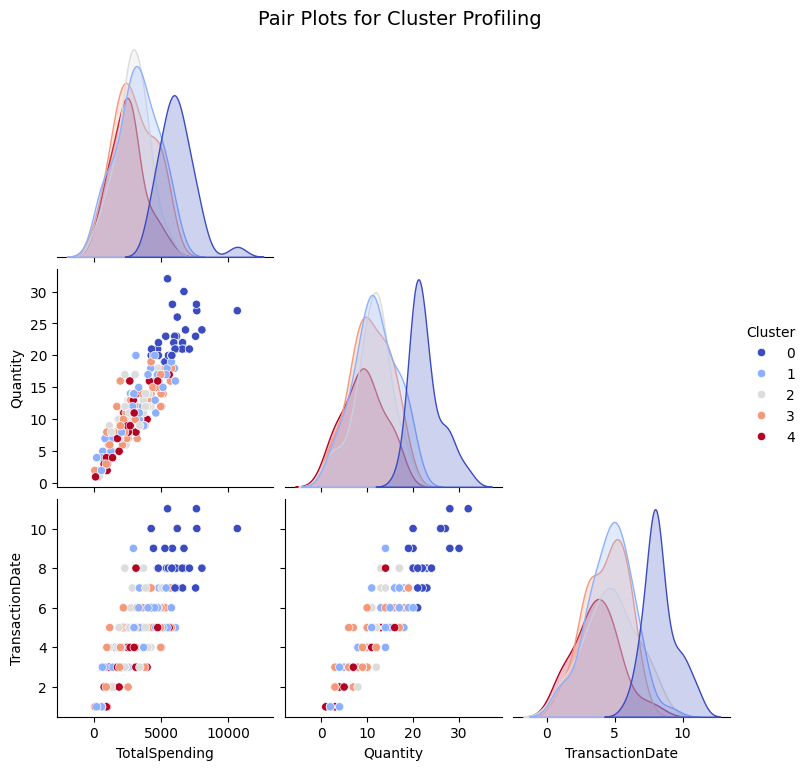


### 3. Bar Plots for Cluster Characteristics ###


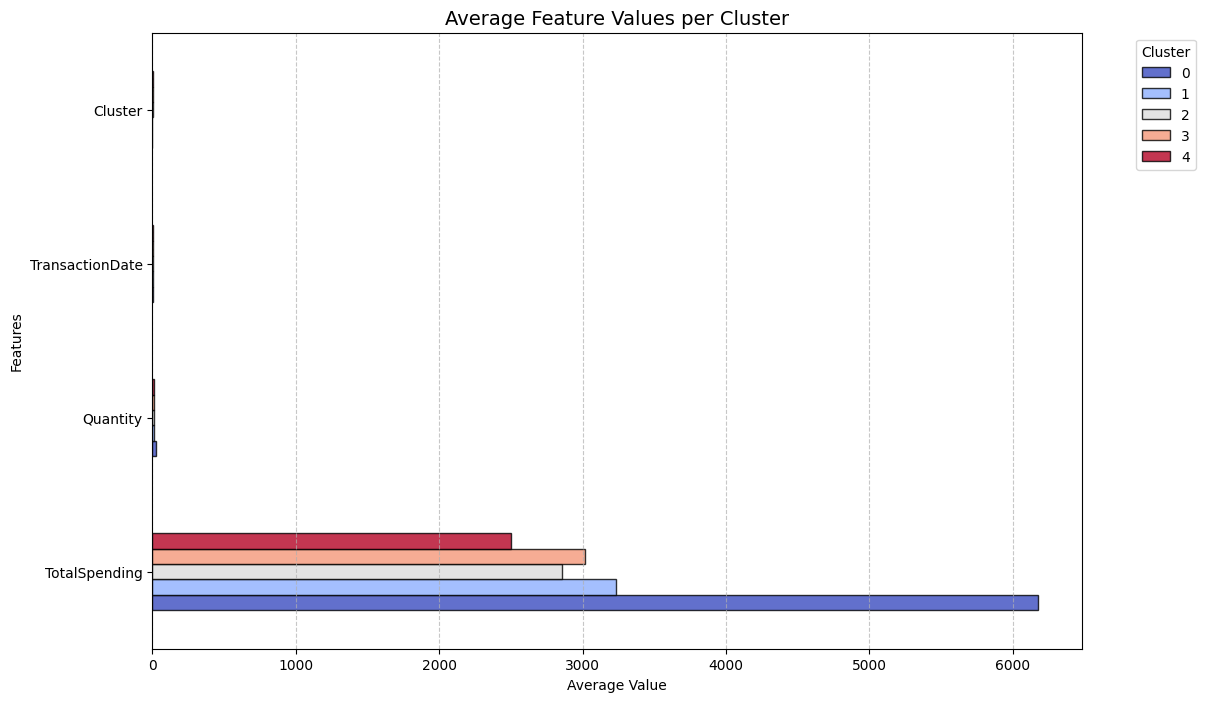


### 4. Heatmap for Categorical Variables (Region) ###


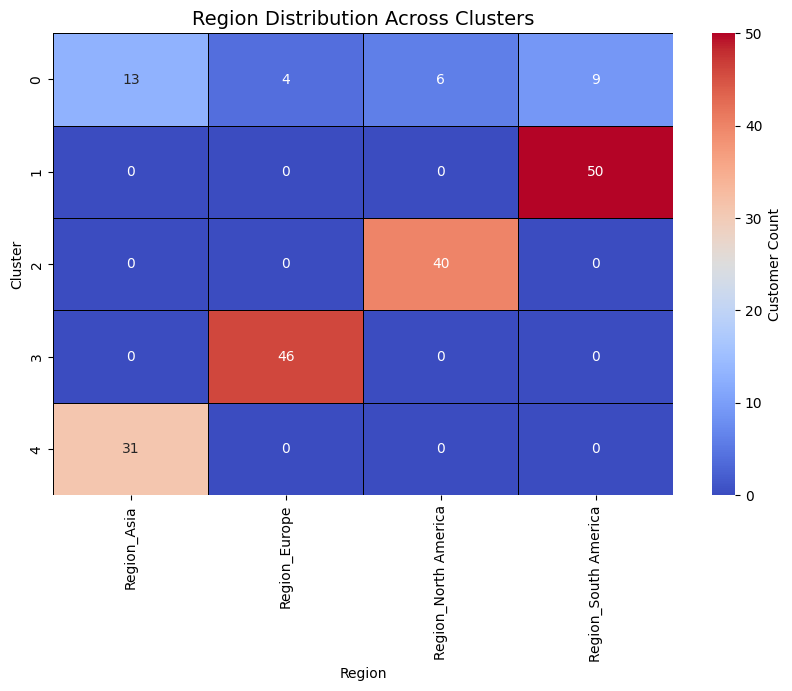

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
shivi_customers = pd.read_csv('Customers.csv')
shivi_transactions = pd.read_csv('Transactions.csv')

# Merge datasets
shivi_data = pd.merge(shivi_transactions, shivi_customers, on='CustomerID')

# Feature engineering
shivi_data['TotalSpending'] = shivi_data['Quantity'] * shivi_data['Price']
shivi_customer_data = shivi_data.groupby('CustomerID').agg({
    'TotalSpending': 'sum',
    'Quantity': 'sum',
    'TransactionDate': 'nunique'
}).reset_index()
shivi_customer_data = pd.merge(shivi_customer_data, shivi_customers, on='CustomerID')

# Encode categorical variables (e.g., Region)
shivi_customer_data = pd.get_dummies(shivi_customer_data, columns=['Region'])

# Normalize data
shivi_scaler = StandardScaler()
shivi_scaled_data = shivi_scaler.fit_transform(shivi_customer_data.drop(columns=['CustomerID', 'CustomerName', 'SignupDate']))

# Clustering
shivi_n_clusters = 5  # Updated to 5 clusters
shivi_kmeans = KMeans(n_clusters=shivi_n_clusters, random_state=42)
shivi_clusters = shivi_kmeans.fit_predict(shivi_scaled_data)
shivi_customer_data['Cluster'] = shivi_clusters

# Evaluate clustering
shivi_db_index = davies_bouldin_score(shivi_scaled_data, shivi_clusters)
shivi_silhouette_avg = silhouette_score(shivi_scaled_data, shivi_clusters)
shivi_calinski_harabasz = calinski_harabasz_score(shivi_scaled_data, shivi_clusters)

# Print clustering results
print("### Clustering Results ###")
print(f"Number of clusters formed: {shivi_n_clusters}")
print(f"Davies-Bouldin Index (DB Index): {shivi_db_index:.4f}")
print(f"Silhouette Score: {shivi_silhouette_avg:.4f}")
print(f"Calinski-Harabasz Index: {shivi_calinski_harabasz:.4f}")
print("\n")

# Enhanced Visualizations

# 1. t-SNE for 2D Visualization
print("### 1. t-SNE for 2D Visualization ###")
shivi_tsne = TSNE(n_components=2, random_state=42)
shivi_tsne_data = shivi_tsne.fit_transform(shivi_scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=shivi_tsne_data[:, 0],
    y=shivi_tsne_data[:, 1],
    hue=shivi_clusters,
    palette='coolwarm',
    s=120,
    alpha=0.8,
    edgecolor='k'
)
plt.title('Customer Clusters (t-SNE)', fontsize=14)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.grid(alpha=0.3)
plt.show()

# 2. Pair Plots for Cluster Profiling
print("\n### 2. Pair Plots for Cluster Profiling ###")
shivi_numeric_columns = shivi_customer_data.select_dtypes(include=[np.number]).columns
shivi_cluster_features = shivi_customer_data[shivi_numeric_columns]
sns.pairplot(shivi_cluster_features, hue='Cluster', palette='coolwarm', corner=True, diag_kind='kde')
plt.suptitle('Pair Plots for Cluster Profiling', y=1.02, fontsize=14)
plt.show()

# 3. Bar Plots for Cluster Characteristics
print("\n### 3. Bar Plots for Cluster Characteristics ###")
shivi_cluster_means = shivi_customer_data.groupby('Cluster')[shivi_numeric_columns].mean()

# Transpose the data for horizontal bar plots
shivi_cluster_means_transposed = shivi_cluster_means.T

# Plot the bar plot
shivi_cluster_means_transposed.plot(kind='barh', figsize=(12, 8), colormap='coolwarm', edgecolor='black', alpha=0.8)
plt.title('Average Feature Values per Cluster', fontsize=14)
plt.xlabel('Average Value')
plt.ylabel('Features')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 4. Heatmap for Categorical Variables (Region)
print("\n### 4. Heatmap for Categorical Variables (Region) ###")
shivi_region_columns = [col for col in shivi_customer_data.columns if col.startswith('Region_')]
shivi_cluster_region = shivi_customer_data.groupby('Cluster')[shivi_region_columns].sum()

plt.figure(figsize=(10, 6))
sns.heatmap(
    shivi_cluster_region,
    annot=True,
    fmt='d',
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='black',
    cbar_kws={'label': 'Customer Count'}
)
plt.title('Region Distribution Across Clusters', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Cluster')
plt.show()
